# Merging data 

In [1]:
from patients import getTargetPatientIcu


dfPatient = getTargetPatientIcu()
dfPatient = dfPatient[["subject_id", "hadm_id", "stay_id"]]
dfPatient

,subject_id,hadm_id,stay_id
0,19277038,20027438,30213832
1,17405009,20041225,32710335
2,19054290,20046699,30643955
3,19523386,20053996,32939862
4,10924444,20065893,31555593
...,...,...,...
1208,14320833,29970786,34923650
1209,13494531,29971659,35179120
1210,11389314,29991667,30620060
1211,12136570,29992577,31780258


Exclude all variables with missing values > 20%. Variables' length must be >= 

In [2]:
len(dfPatient) * 80 / 100

970.4

## AKD Positive

In [3]:
import akd_positive


dfAkd = akd_positive.extractKdigoStages7day()
dfAkd["akd"] = dfAkd["aki_7day"]
dfAkd = dfAkd[["stay_id", "akd"]]

dfData1 = dfPatient.merge(dfAkd, "left", "stay_id")
dfData1["akd"] = dfData1["akd"].astype(bool)

dfData1["akd"].value_counts()

akd
False    737
True     476
Name: count, dtype: int64

## Diabetes' characteristics 

Missing value here is associated with False/NotHappened

### Diabete Type

In [4]:
from variables_charateristics_diabetes import getDiabeteType


df = getDiabeteType()
df["dka_type"] = df["dka_type"].astype(int)
dfData1_b = dfData1.merge(df, "left", "stay_id")
dfData1_b["dka_type"].value_counts()

dka_type
1    741
2    357
0    115
Name: count, dtype: int64

### Macroangiopathy

In [5]:
import variables_charateristics_diabetes


df = variables_charateristics_diabetes.getMacroangiopathy()
dfData2 = dfData1_b.merge(df, "left", "hadm_id")
dfData2["macroangiopathy"].fillna(False, inplace=True)
dfData2["macroangiopathy"].value_counts()

macroangiopathy
False    930
True     469
Name: count, dtype: int64

### Microangiopathy

In [6]:
import variables_charateristics_diabetes


df = variables_charateristics_diabetes.getMicroangiopathy()
dfData3 = dfData2.merge(df, "left", "hadm_id")
dfData3["microangiopathy"].fillna(False, inplace=True)
dfData3["microangiopathy"].value_counts()

microangiopathy
False    1028
True      372
Name: count, dtype: int64

## Demographics

### Age

In [7]:
import variables_demographics


df = variables_demographics.getAge()
df.__len__()

1213

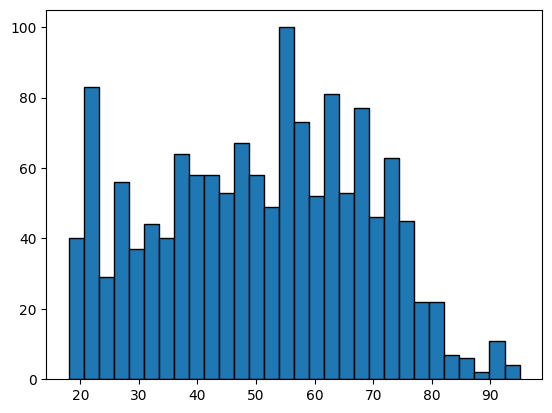

In [8]:
from matplotlib import pyplot as plt


dfData4 = dfData3.merge(df, "outer", "stay_id")
plt.hist(dfData4["age"], bins=30, edgecolor="black")
plt.show()

### Gender

In [9]:
df = variables_demographics.getGender()
df.__len__()

1213

In [10]:
dfData5 = dfData4.merge(df, "outer", "stay_id")
dfData5["gender"].value_counts()

gender
F    738
M    662
Name: count, dtype: int64

### Ethnicity

In [11]:
df = variables_demographics.getEthnicity()
df.__len__()

1213

In [12]:
dfData6 = dfData5.merge(df, "outer", "stay_id")
dfData6["race"].value_counts()

race
WHITE                                        775
BLACK/AFRICAN AMERICAN                       345
UNKNOWN                                       67
OTHER                                         41
HISPANIC OR LATINO                            25
HISPANIC/LATINO - PUERTO RICAN                23
WHITE - OTHER EUROPEAN                        21
HISPANIC/LATINO - DOMINICAN                   17
BLACK/CARIBBEAN ISLAND                        14
ASIAN - CHINESE                               12
ASIAN                                         10
WHITE - RUSSIAN                                9
UNABLE TO OBTAIN                               7
BLACK/CAPE VERDEAN                             7
BLACK/AFRICAN                                  7
ASIAN - SOUTH EAST ASIAN                       6
HISPANIC/LATINO - GUATEMALAN                   3
HISPANIC/LATINO - SALVADORAN                   2
HISPANIC/LATINO - MEXICAN                      2
MULTIPLE RACE/ETHNICITY                        1
WHITE - BRAZILI

### Height

missing to many values

In [13]:
df = variables_demographics.getHeight()
df.__len__()

830

### Weight

In [14]:
df = variables_demographics.getWeight()
df.__len__()

1195

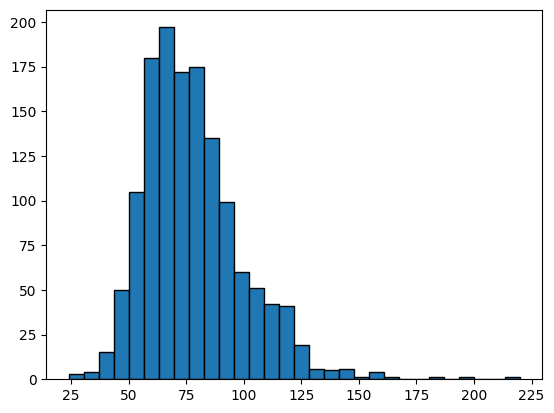

In [15]:
from matplotlib import pyplot as plt

dfData7 = dfData6.merge(df, "outer", "stay_id")
dfData7["weight"].value_counts()

plt.hist(dfData7["weight"], bins=30, edgecolor="black")
plt.show()

## Interventions

Missing value here is associated with patient didn't received the intervention

### Mechanical ventilation

In [16]:
import variables_interventions


df = variables_interventions.getMV()
dfData8 = dfData7.merge(df, "left", "stay_id")
dfData8["mechanical_ventilation"].fillna(False, inplace=True)
dfData8["mechanical_ventilation"].value_counts()

mechanical_ventilation
False    1305
True       95
Name: count, dtype: int64

### Continuous renal replacement therapy

In [17]:
df = variables_interventions.getCrrt()
dfData9 = dfData8.merge(df, "left", "stay_id")
dfData9["use_crrt"].fillna(False, inplace=True)
dfData9["use_crrt"].value_counts()

use_crrt
False    1395
True        5
Name: count, dtype: int64

### Use of NaHCO3

In [18]:
df = variables_interventions.getNaHCO3()
dfData10 = dfData9.merge(df, "left", "stay_id")
dfData10["use_NaHCO3"].fillna(False, inplace=True)
dfData10["use_NaHCO3"].value_counts()

use_NaHCO3
False    1285
True      115
Name: count, dtype: int64

## Laboratory tests

#### White blood cell

In [19]:
import variables_lab_test

df = variables_lab_test.getWbc().dropna()
df

,stay_id,wbc
0,30002521,2.8
1,30006067,7.3
2,30007216,3.1
3,30012944,11.7
4,30033055,18.5
...,...,...
1207,39939904,8.0
1208,39947352,20.8
1210,39961214,11.8
1211,39968693,18.9


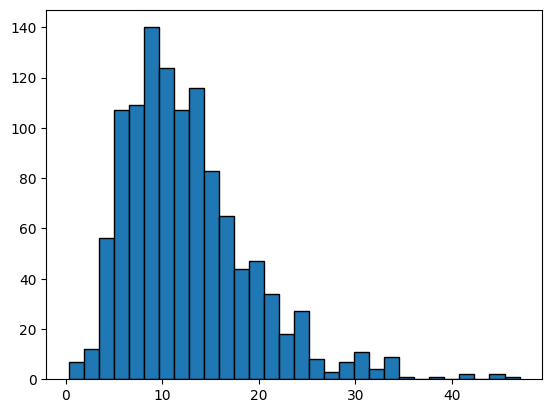

In [20]:
from matplotlib import pyplot as plt

dfData11 = dfData10.merge(df, "left", "stay_id")

plt.hist(df["wbc"], bins=30, edgecolor="black")
plt.show()

### Lymphocyte

In [21]:
df = variables_lab_test.getLymphocyte().dropna()
df.__len__()

446

Missing too many values

### Hemoglobin

In [22]:
df = variables_lab_test.getHb().dropna()
df.__len__()

1145

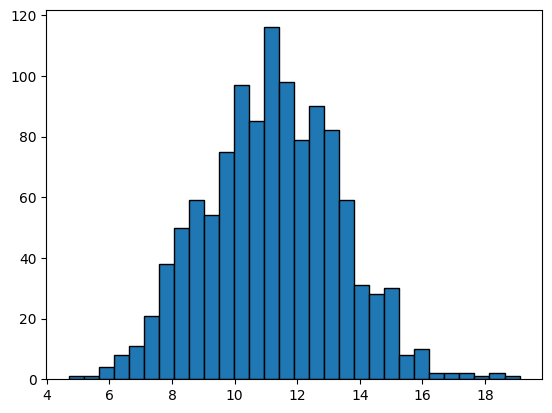

In [23]:
from matplotlib import pyplot as plt

plt.hist(df["hb"], bins=30, edgecolor="black")
plt.show()

dfData12 = dfData11.merge(df, "left", "stay_id")

### Plateles

In [24]:
df = variables_lab_test.getPlt().dropna()
df.__len__()

1147

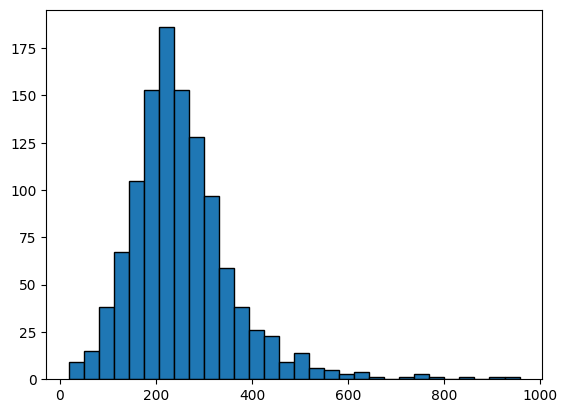

In [25]:
from matplotlib import pyplot as plt

plt.hist(df["plt"], bins=30, edgecolor="black")
plt.show()
dfData13 = dfData12.merge(df, "left", "stay_id")

### Partial pressure of O2
Missing too many values

In [26]:
df = variables_lab_test.getPO2().dropna()
df.__len__()

917

### Partial pressure of CO2
Missing too many values

In [27]:
df = variables_lab_test.getPCO2().dropna()
df.__len__()

917

### pH
Missing too many values

In [28]:
df = variables_lab_test.get_pH().dropna()
df.__len__()

954

### Anion gap

In [29]:
df = variables_lab_test.getAG().dropna()
df.__len__()

1208

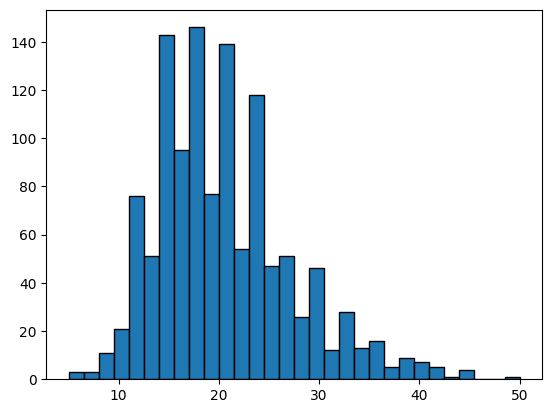

In [30]:
from matplotlib import pyplot as plt

plt.hist(df["ag"], bins=30, edgecolor="black")
plt.show()
dfData14 = dfData13.merge(df, "left", "stay_id")

### Bicarbonate

In [31]:
df = variables_lab_test.getBicarbonate().dropna()
df.__len__()

1208

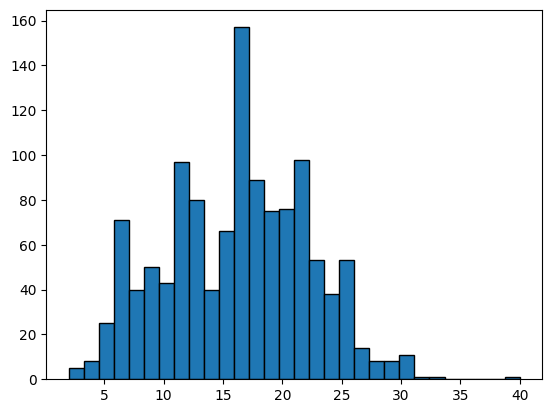

In [32]:
from matplotlib import pyplot as plt

plt.hist(df["bicarbonate"], bins=30, edgecolor="black")
plt.show()
dfData15 = dfData14.merge(df, "left", "stay_id")

### Blood urea nitrogen

In [33]:
df = variables_lab_test.getBun().dropna()
df.__len__()

1208

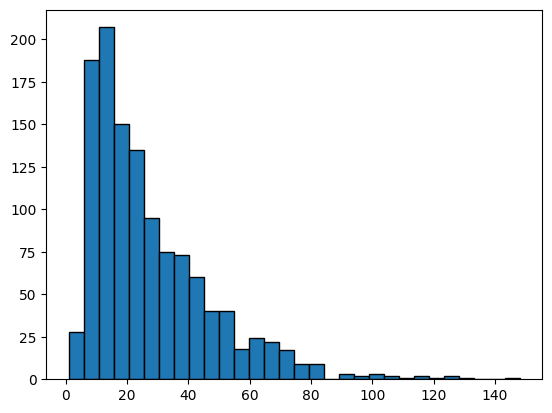

In [34]:
from matplotlib import pyplot as plt

plt.hist(df["bun"], bins=30, edgecolor="black")
plt.show()
dfData16 = dfData15.merge(df, "left", "stay_id")

### Calcium

In [35]:
df = variables_lab_test.getCalcium().dropna()
df.__len__()

1203

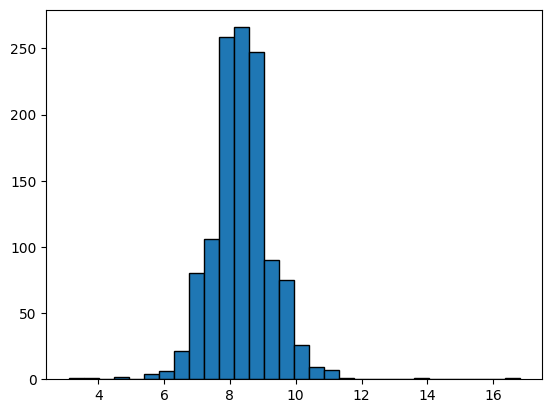

In [36]:
from matplotlib import pyplot as plt
plt.hist(df["calcium"], bins=30, edgecolor="black")
plt.show()
dfData17 = dfData16.merge(df, "left", "stay_id")

### Serum creatinine

In [37]:
df = variables_lab_test.getScr().dropna()
df.__len__()

1208

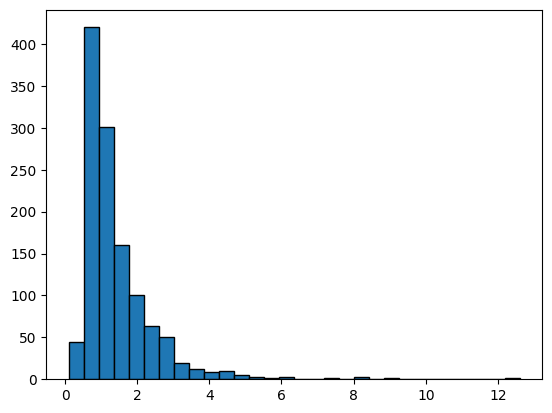

In [38]:
from matplotlib import pyplot as plt
plt.hist(df["scr"], bins=30, edgecolor="black")
plt.show()
dfData18 = dfData17.merge(df, "left", "stay_id")

### Blood glucose

In [39]:
df = variables_lab_test.getBg().dropna()
df.__len__()

1208

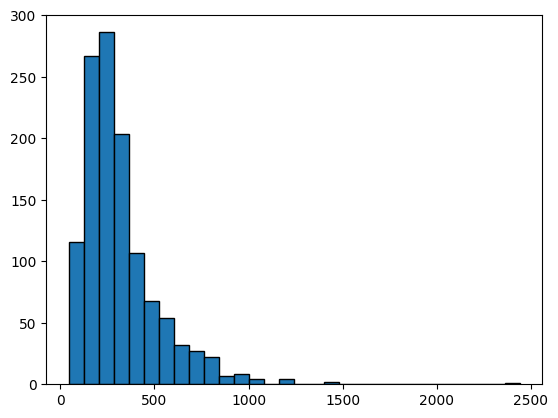

In [40]:
from matplotlib import pyplot as plt
plt.hist(df["bg"], bins=30, edgecolor="black")
plt.show()
dfData19 = dfData18.merge(df, "left", "stay_id")

### Phosphate

In [41]:
df = variables_lab_test.getPhosphate().dropna()
df.__len__()

1204

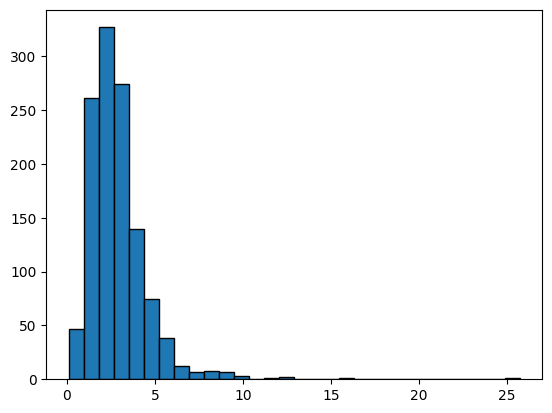

In [42]:
from matplotlib import pyplot as plt
plt.hist(df["phosphate"], bins=30, edgecolor="black")
plt.show()
dfData20 = dfData19.merge(df, "left", "stay_id")

### Albumin
Too many missing values

In [43]:
df = variables_lab_test.getAlbumin().dropna()
df.__len__()

406

### Estimated glomerular filtration rate

In [44]:
df = variables_lab_test.get_eGFR().dropna()
df.__len__()

1208

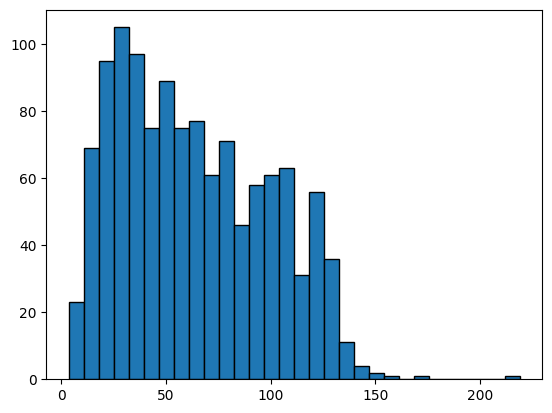

In [45]:
from matplotlib import pyplot as plt
plt.hist(df["egfr"], bins=30, edgecolor="black")
plt.show()
dfData22 = dfData20.merge(df, "left", "stay_id")

### HemoglobinA1c
Too many missing values

In [46]:
df = variables_lab_test.getHbA1C().dropna()
df.__len__()

326

### C-reactive protein
Too many missing values

In [47]:
df = variables_lab_test.getCrp().dropna()
df.__len__()

19

### Urine Ketone
Too many missing values

In [48]:
df = variables_lab_test.getUrineKetone().dropna()
df.__len__()

294

## Scoring systems

### Glasgow coma scale

In [49]:
import variables_scoring_systems


df = variables_scoring_systems.getGcs().dropna()
df.__len__()

1211

In [50]:
dfData23 = dfData22.merge(df, "left", "stay_id")

df["gcs"].value_counts()

gcs
15.0    806
14.0    241
13.0     64
8.0      16
12.0     16
3.0      14
10.0     13
11.0     12
9.0      10
7.0       8
6.0       5
5.0       4
4.0       2
Name: count, dtype: int64

### Oasis

In [51]:
from variables_scoring_systems import getOasis


df = getOasis().dropna()
df.__len__()

1213

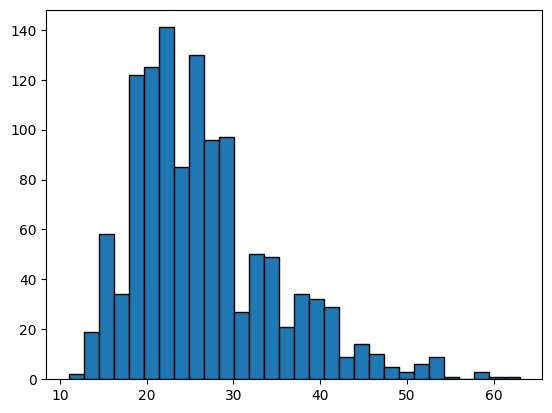

In [52]:
from matplotlib import pyplot as plt

plt.hist(df["oasis"], bins=30, edgecolor="black")
plt.show()
dfData24 = dfData23.merge(df, "left", "stay_id")

### Others
TODO: add later

## Vital signs

### Heart Rate

In [53]:
from variables_vital_signs import getHeartRate


df = getHeartRate().dropna()
df.__len__()

1212

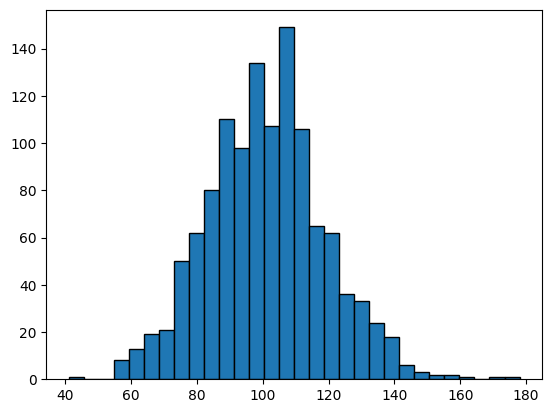

In [54]:
from matplotlib import pyplot as plt
plt.hist(df["hr"], bins=30, edgecolor="black")
plt.show()
dfData25 = dfData24.merge(df, "left", "stay_id")

### Respiratory Rate

In [55]:
from variables_vital_signs import getRespiratoryRate


df = getRespiratoryRate().dropna()
df.__len__()

1211

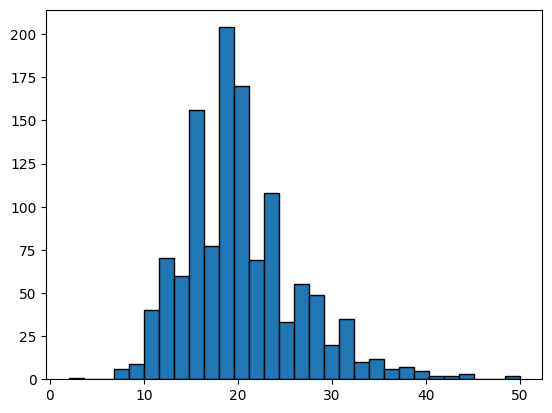

In [56]:
from matplotlib import pyplot as plt
plt.hist(df["rr"], bins=30, edgecolor="black")
plt.show()
dfData26 = dfData25.merge(df, "left", "stay_id")

### Systolic Blood Pressure

In [57]:
from variables_vital_signs import getSystolicBloodPressure


df = getSystolicBloodPressure().dropna()
df.__len__()

1210

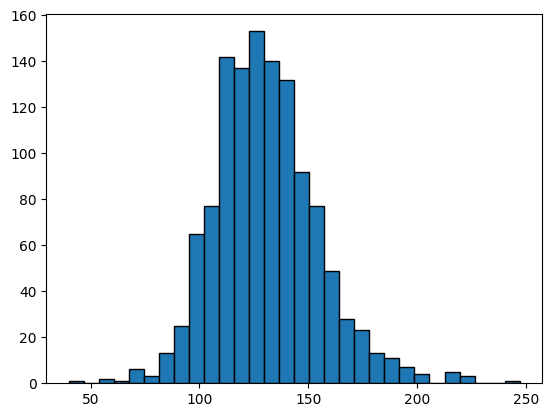

In [58]:
from matplotlib import pyplot as plt
plt.hist(df["sbp"], bins=30, edgecolor="black")
plt.show()
dfData27 = dfData26.merge(df, "left", "stay_id")

### Diastolic Blood Pressure

In [59]:
from variables_vital_signs import getDiastolicBloodPressure


df = getDiastolicBloodPressure().dropna()
df.__len__()

1210

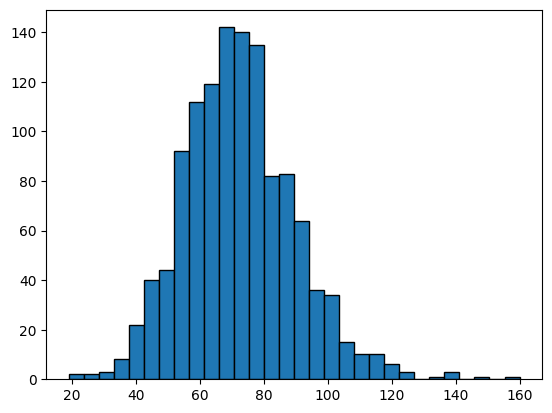

In [60]:
from matplotlib import pyplot as plt
plt.hist(df["dbp"], bins=30, edgecolor="black")
plt.show()
dfData28 = dfData27.merge(df, "left", "stay_id")

## Prognosis

### How long patients stayed in hospital before Icu admission

In [61]:
from variables_prognosis import getPreIcuLos


df = getPreIcuLos().dropna()
df.__len__()

1213

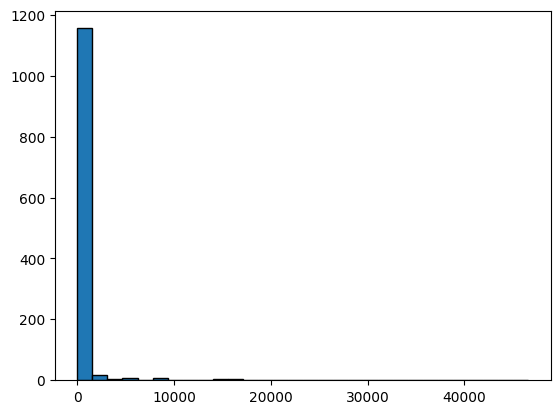

In [62]:
from matplotlib import pyplot as plt

plt.hist(df["preiculos"], bins=30, edgecolor="black")
plt.show()

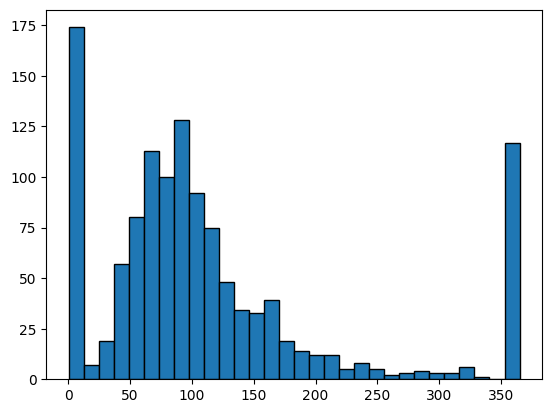

In [63]:
from matplotlib import pyplot as plt
import numpy as np

LOS_FLOOR = 365
preiculos = np.where(df["preiculos"] > LOS_FLOOR, LOS_FLOOR, df["preiculos"])

plt.hist(preiculos, bins=30, edgecolor="black")
plt.show()

In [64]:
df["preiculos"] = preiculos
dfData29 = dfData28.merge(df, "left", "stay_id")

## Comorbidities
Missing value means no comorbidity

### Acute cerebral infarction

In [65]:
from variables_comorbidities import getHistoryACI


df = getHistoryACI()
dfData30 = dfData29.merge(df, "left", "hadm_id")
dfData30["history_aci"].fillna(False, inplace=True)
dfData30["history_aci"].value_counts()

history_aci
False    1289
True      111
Name: count, dtype: int64

### Acute myocardial infarction

In [66]:
from variables_comorbidities import getHistoryAMI


df = getHistoryAMI()
dfData31 = dfData30.merge(df, "left", "hadm_id")
dfData31["history_ami"].fillna(False, inplace=True)

dfData31["history_ami"].value_counts()

history_ami
False    1083
True      317
Name: count, dtype: int64

### Congestive heart failure

In [67]:
from variables_comorbidities import getCHF


df = getCHF()
dfData32 = dfData31.merge(df, "left", "hadm_id")
dfData32["congestive_heart_failure"].fillna(False, inplace=True)
dfData32["congestive_heart_failure"].value_counts()

congestive_heart_failure
False    1120
True      280
Name: count, dtype: int64

### Liver disease

In [68]:
from variables_comorbidities import getLiverDisease


df = getLiverDisease()
dfData33 = dfData32.merge(df, "left", "hadm_id")
dfData33["liver_disease"].fillna("NONE", inplace=True)
dfData33["liver_disease"].value_counts()

liver_disease
NONE      1270
MILD       103
SEVERE      27
Name: count, dtype: int64

### PreExisting CKD

In [69]:
from variables_comorbidities import getPreExistingCKD


df = getPreExistingCKD()
dfData34 = dfData33.merge(df, "left", "hadm_id")
dfData34["ckd_stage"].value_counts()

ckd_stage
0.0    165
3.0    106
4.0     47
2.0      9
1.0      2
Name: count, dtype: int64

### Malignant Cancer

In [70]:
from variables_comorbidities import getMalignantCancer


df = getMalignantCancer()
dfData35 = dfData34.merge(df, "left", "hadm_id")
dfData35["malignant_cancer"].fillna(False, inplace=True)
dfData35["malignant_cancer"].value_counts()

malignant_cancer
False    1350
True       50
Name: count, dtype: int64

### Hypertension

In [71]:
from variables_comorbidities import getHypertension


df = getHypertension()
dfData36 = dfData35.merge(df, "left", "hadm_id")
dfData36["hypertension"].fillna(False, inplace=True)
dfData36["hypertension"].value_counts()

hypertension
False    868
True     533
Name: count, dtype: int64

### Urinary tract infection

In [72]:
from variables_comorbidities import getUTI


df = getUTI()
dfData37 = dfData36.merge(df, "left", "hadm_id")
dfData37["uti"].fillna(False, inplace=True)
dfData37["uti"].value_counts()

uti
False    1225
True      176
Name: count, dtype: int64

### Chronic Pulmonary Disease

In [73]:
from variables_comorbidities import getChronicPulmonaryDisease


df = getChronicPulmonaryDisease()
dfData38 = dfData37.merge(df, "left", "hadm_id")
dfData38["chronic_pulmonary_disease"].fillna(False, inplace=True)
dfData38["chronic_pulmonary_disease"].value_counts()

chronic_pulmonary_disease
False    1167
True      234
Name: count, dtype: int64

In [74]:
dfData38.dtypes

subject_id                     int64
hadm_id                        int64
stay_id                        int64
akd                             bool
dka_type                       int64
macroangiopathy                 bool
microangiopathy                 bool
age                            int64
gender                        object
race                          object
weight                       float64
mechanical_ventilation          bool
use_crrt                        bool
use_NaHCO3                      bool
wbc                          float64
hb                           float64
plt                          float64
ag                           float64
bicarbonate                  float64
bun                          float64
calcium                      float64
scr                          float64
bg                           float64
phosphate                    float64
egfr                         float64
gcs                          float64
oasis                        float64
h

# Save data

In [75]:
from constants import LEARNING_DATA_FILE


dfData38.to_csv(LEARNING_DATA_FILE)
dfData38

,subject_id,hadm_id,stay_id,akd,dka_type,macroangiopathy,microangiopathy,age,gender,race,...,preiculos,history_aci,history_ami,congestive_heart_failure,liver_disease,ckd_stage,malignant_cancer,hypertension,uti,chronic_pulmonary_disease
0,19277038,20027438,30213832,False,1,False,True,64,F,HISPANIC/LATINO - DOMINICAN,...,2.183333,False,False,True,NONE,0.0,False,False,True,True
1,17405009,20041225,32710335,False,2,False,False,39,F,BLACK/AFRICAN AMERICAN,...,27.133333,False,False,False,NONE,NaN,False,False,False,False
2,19054290,20046699,30643955,False,1,False,True,65,F,WHITE,...,142.000000,False,False,False,NONE,NaN,False,True,False,False
3,19523386,20053996,32939862,False,2,False,False,83,F,WHITE,...,110.000000,False,False,False,NONE,NaN,False,False,True,False
4,10924444,20065893,31555593,False,1,False,False,23,M,WHITE,...,60.000000,False,False,False,NONE,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,14320833,29970786,34923650,True,1,True,True,64,F,WHITE,...,173.000000,False,True,True,NONE,NaN,False,True,False,False
1397,13494531,29971659,35179120,False,0,True,False,76,M,WHITE,...,64.000000,False,False,True,NONE,4.0,True,False,False,False
1398,11389314,29991667,30620060,False,2,False,False,54,F,WHITE,...,91.000000,False,False,False,SEVERE,NaN,False,False,True,False
1399,12136570,29992577,31780258,True,2,False,False,56,M,BLACK/AFRICAN AMERICAN,...,99.000000,True,False,False,NONE,NaN,False,False,False,False
